# Installing requirements

`pip install -r requirements.txt`

# Import and connections

In [93]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD

# Data generation & separation

In [94]:
X, y = make_moons(n_samples=390, noise=0.3, random_state=666)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=666,
    shuffle=True
)

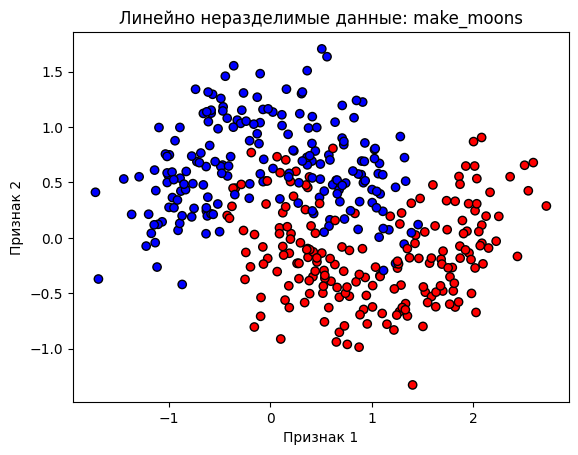

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Линейно неразделимые данные: make_moons")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

# Creating model

In [97]:
model = Sequential([
    Dense(2, activation='linear', input_shape=(2,)), # линейная activation, т.к. входной слой
    Dense(4, activation='relu'), 
    Dense(1, activation='sigmoid')
])

# Train

In [102]:
model.compile(
    optimizer=SGD(learning_rate=0.001), # SGD с маленьким шагом, чтобы графики потерь были интересные
    loss='binary_crossentropy',         # для бинарной классификации
    metrics=['accuracy']
)

In [103]:
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6442 - loss: 0.5915 - val_accuracy: 0.6282 - val_loss: 0.6182
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6442 - loss: 0.5909 - val_accuracy: 0.6282 - val_loss: 0.6179
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6474 - loss: 0.5903 - val_accuracy: 0.6282 - val_loss: 0.6176
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6442 - loss: 0.5897 - val_accuracy: 0.6282 - val_loss: 0.6173
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6474 - loss: 0.5890 - val_accuracy: 0.6282 - val_loss: 0.6170
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.5884 - val_accuracy: 0.6282 - val_loss: 0.6167
Epoch 7/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.5878 - val_accuracy: 0.6282 - val_loss: 0.6163
Epoch 8/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6506 - loss: 0.5872 - val_accuracy: 0.

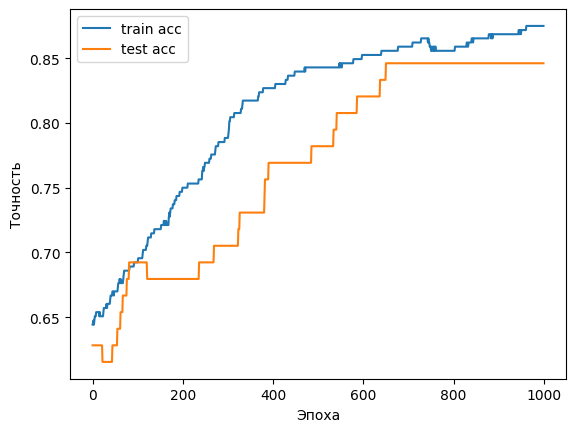

In [104]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [105]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Точность на тесте: {acc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8462 - loss: 0.3438 
Точность на тесте: 0.8462
